# *The Best Solution*

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2019)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [30]:
data=pd.read_csv(r'C:\Users\karth\Desktop\ineuron_hackathon\adult.csv')

In [ ]:
pd.get_dummies

In [31]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
data.shape

(32561, 15)

In [33]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

***Checking for special characters in the coloumns***

In [34]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [35]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [36]:
data['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

***We have some special charaters(?) in some of our coloumns(workclass,occupation,country)***

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

***Changing the predictive categorical values to 0(<=50K) and 1(>50K)***

In [39]:
# data['salary']=data['salary'].astype(str)

In [40]:
data['salary']=data['salary'].apply(lambda x: 0 if x==' <=50K' else 1)

In [41]:
data['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

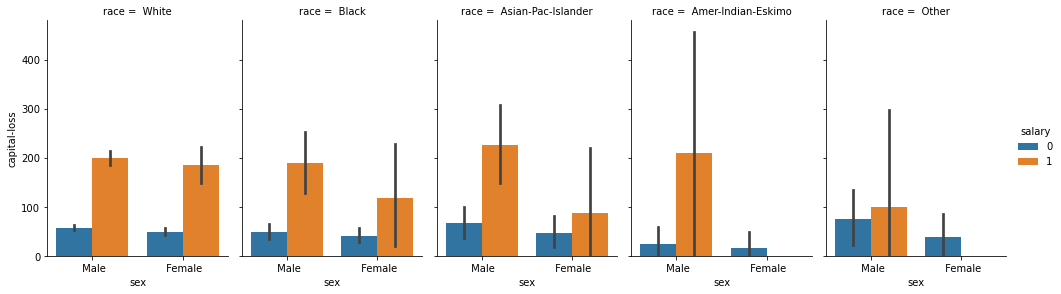

In [42]:
g = sns.catplot(x="sex", y="capital-loss",
                hue="salary", col="race",
                data=data, kind="bar",
                height=4, aspect=.7);

***The Amer-Indian-Eskimo Male is making huge capital-loss***

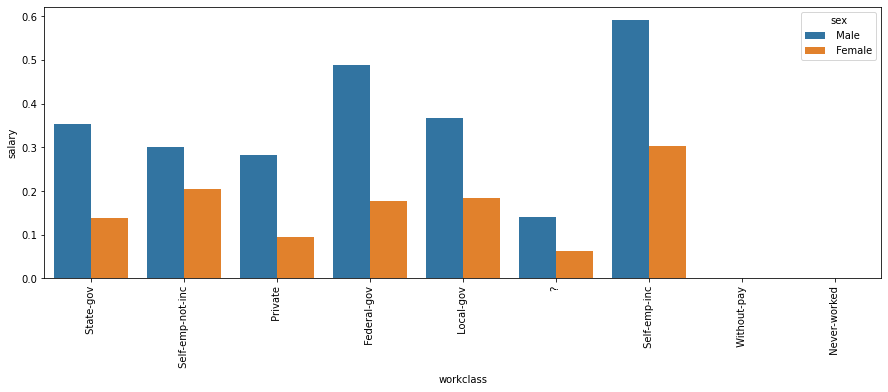

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x="workclass", y="salary", hue='sex', data=data, ci=None)
plt.xticks(rotation=90);

***Self-emp males and females earns more***

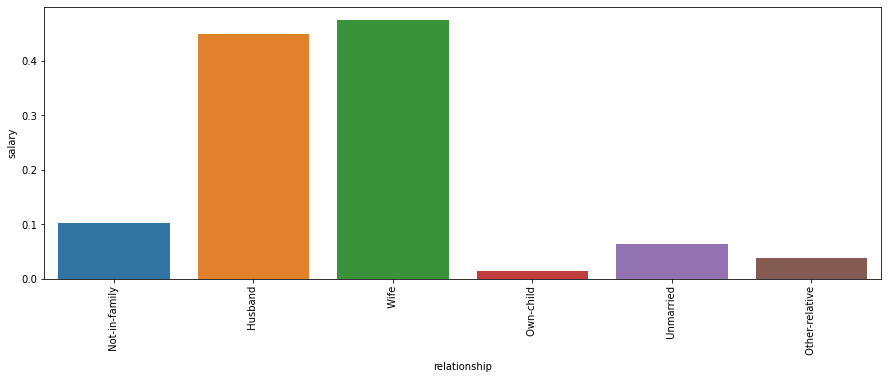

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x="relationship", y="salary", data=data, ci=None)
plt.xticks(rotation=90);

***Husband and wifes more often earns more***

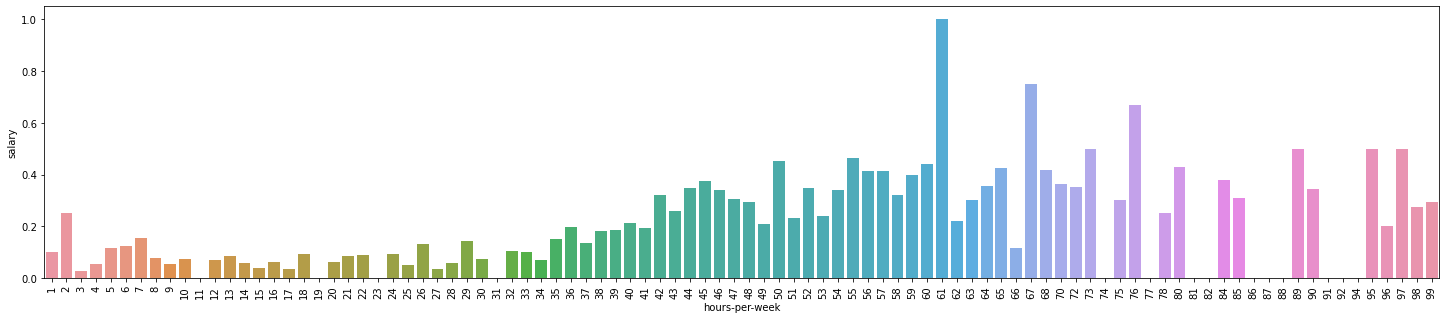

In [45]:
plt.figure(figsize=(25, 5))
sns.barplot(x="hours-per-week", y="salary", data=data, ci=None)
plt.xticks(rotation=90);

***Those who work for the shortest time not earn more than 50K, which is not surprising.. But also those working the longest do not earn more than 50k more often than those working between 50 and 75 hours a week. Only working for 61 hours is close to earning more than 50K or 50K.***

Text(0.5, 1.0, 'Top 10 Working hours')

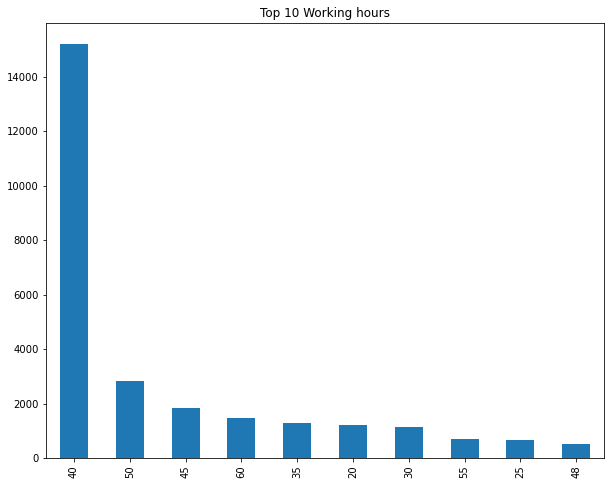

In [46]:
top_10 = data['hours-per-week'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 Working hours')

In [47]:
cat_feats = data.select_dtypes(include=[np.object]).columns

In [48]:
for cat_feat in cat_feats:
    data['{0}_cat'.format(cat_feat)] = pd.factorize(data[cat_feat])[0]

In [49]:
cat_feats

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object')

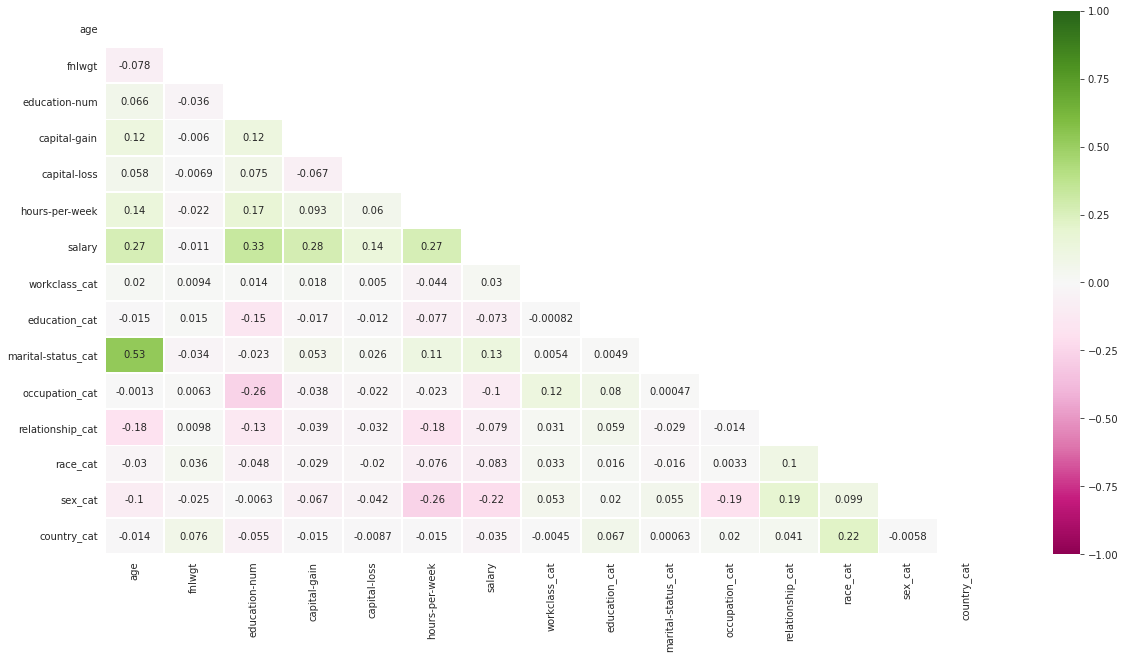

In [50]:
corr=data.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='PiYG')

***At first glance, it looks like the moste valuable features are: Age, Education_num, Sex (hate it!), Capital Gain and hours per week. Matrial_status & Capital Loss should not be ignored also.***

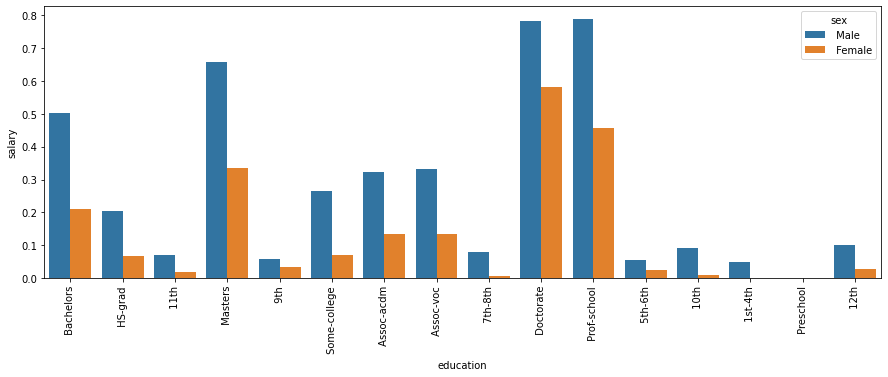

In [51]:
plt.figure(figsize=(15, 5))
sns.barplot(x="education", y="salary", hue='sex', data=data, ci=None)
plt.xticks(rotation=90);

***Doctors, Masters and Prof-schools earns more.***

In [52]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [53]:
def middle_age_man(row):
    good_age = range(35,60)
    return int(good_age.count(row['age']) and row['sex'] == True)

def working_vs_ocuppation(row):
    if (row['working_less_or_more_4'] in [3,4]) and (row['occupation_cat'] in [0,1,3,5,10]):
        return row['working_less_or_more_4'] + row['occupation_cat']
    else:
        return 0

def working_more_4(row):
    if row['hours-per-week'] < 35:
        more = 0
    elif row['hours-per-week'] >=35 and  row['hours-per-week'] <= 42:
        more = 1
    elif row['hours-per-week'] > 42 and row['hours-per-week'] <= 73:
        more = 3 
    elif row['hours-per-week'] > 73:
        more = 2
    else:
        more = 'to_check'
    return more

def occupation_2(row): #new
    return int(row['occupation'] in ['Prof-specialty','Exec-managerial'] and row['sex'] == True)
        
data['Education_is_high'] = (data.education.isin(['Masters', 'Doctorate', 'Prof-school']))
data['middle_age_man'] = data.apply(middle_age_man, axis=1)
data['is_US'] = (data.country.isin(['United-States']))
data['working_less_or_more_4'] = data.apply(working_more_4, axis = 1)
data['working_vs_ocuppation_test'] = data.apply(working_vs_ocuppation, axis = 1)
data['husband_wife'] = data['relationship'].map(lambda x: int((x =='Husband') | (x == 'Wife') )) #new
data['occupation_2'] = data.apply(occupation_2, axis=1) #new
data.drop('fnlwgt', axis=1, inplace=True) 
data.drop('education_cat', axis=1, inplace=True) #Education num is better
data.drop('race_cat', axis=1, inplace=True) #not much impact 
data.drop('country_cat', axis=1, inplace=True) #replaced by is_us


In [57]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,workclass_cat,education_cat,marital-status_cat,occupation_cat,relationship_cat,race_cat,sex_cat,country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,0,1,1,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,2,1,2,2,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,2,2,1,2,1,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,2,0,1,3,2,1,1,1


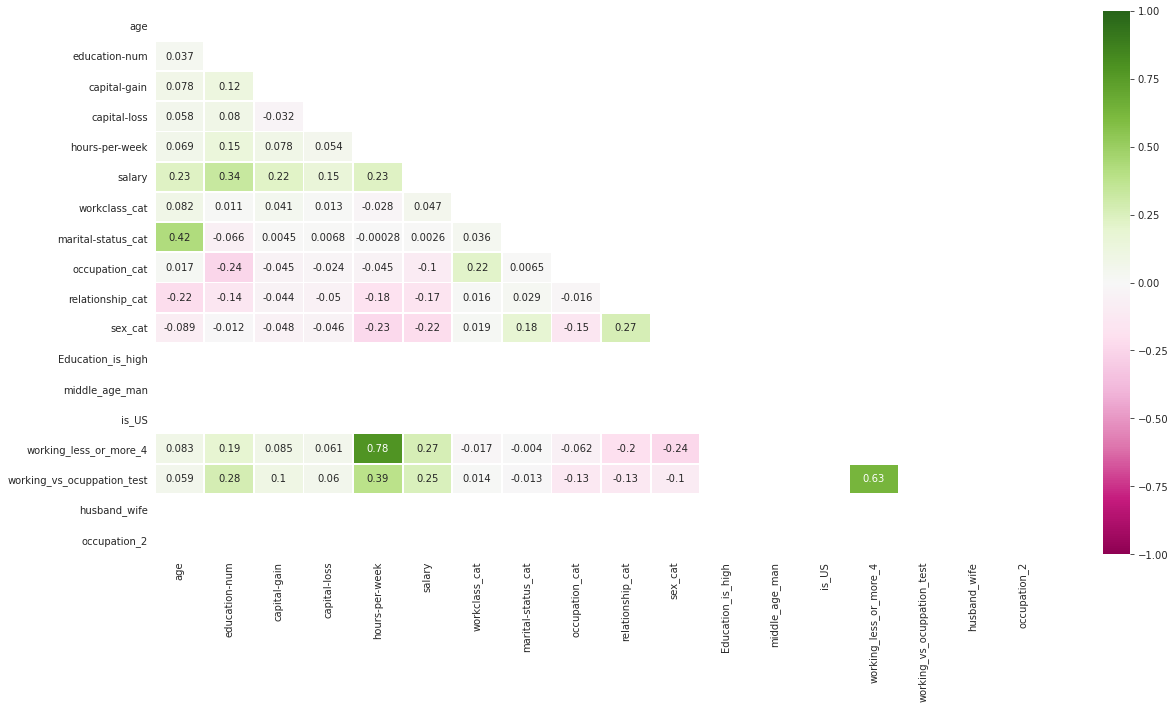

In [48]:
corr=data.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='PiYG')

***Division into train and test data (train_test_split)***

In [29]:
features = data.select_dtypes(include=['int8', 'int16', 'int64', 'bool']).columns.values
features = features[features!=['salary']]

X = data[ features ].values
y = data['salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 17) (22792,)
Test: (9769, 17) (9769,)


In [30]:
features

array(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_cat', 'marital-status_cat',
       'occupation_cat', 'relationship_cat', 'sex_cat',
       'Education_is_high', 'middle_age_man', 'is_US',
       'working_less_or_more_4', 'working_vs_ocuppation_test',
       'husband_wife', 'occupation_2'], dtype=object)

**Modelling + Hyper Parameter Tuning**

In [38]:
def train_and_predict(X_train, X_test, y_train, y_test, model, success_metric=accuracy_score):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Distribution:")
    print( pd.Series(y_pred).value_counts() )
    
    return success_metric(y_test, y_pred)

model = RandomForestClassifier(max_depth = 9)

train_and_predict(X_train, X_test, y_train, y_test, model)

Distribution:
0    8153
1    1616
dtype: int64


0.8583273620636708

In [39]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_probas = model.predict_proba(X_test)

In [40]:
df_test = pd.DataFrame(X_test, columns=features)
df_test['y_pred'] = y_pred
df_test['y_pred_proba'] = y_pred_probas[ :, 1 ]
df_test['y_test'] = y_test

df_test['is_correct'] = y_pred == y_test

df_test.head()


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_cat,marital-status_cat,occupation_cat,relationship_cat,sex_cat,Education_is_high,middle_age_man,is_US,working_less_or_more_4,working_vs_ocuppation_test,husband_wife,occupation_2,y_pred,y_pred_proba,y_test,is_correct
0,24,9,0,0,40,5,1,11,2,1,False,0,False,1,0,0,0,0,0.167382,0,True
1,43,14,0,0,30,2,0,4,0,1,False,0,False,0,0,0,0,0,0.085942,0,True
2,29,10,0,0,40,2,1,1,1,0,False,0,False,1,0,0,0,0,0.260466,0,True
3,26,10,0,0,35,2,0,4,0,1,False,0,False,1,0,0,0,0,0.008935,0,True
4,28,4,0,0,40,2,1,6,1,0,False,0,False,1,0,0,0,0,0.114198,0,True


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [44]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

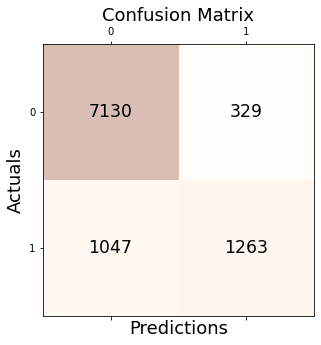

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [46]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.793


In [47]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.547


# Summary

**1. This dataset not balance , i.e. 76% of them are belong to income group 1 (who earns more than 50k) and 23.93% fall under the income group 0 (who earns less than 50k).**

**2. Females have more flexible working hours per week in the income groups who earns <=50k.**

**3. Males have more flexible working hours per week in the income groups who earns >50k.**

**4. Generally people can be seen working for 30 hours to 40 hours per week.**

**5. Income group who earns >50k have flexible working hours.**

**6. People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary)**